# Лабораторная работа №4.
## Реализация приложения по распознаванию номеров домов.

In [83]:
%matplotlib inline

import os
import json
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import *
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import sequence
import h5py
import cv2
from  tensorflow.keras import Input
from  tensorflow import keras

IMAGE_SIZE = 28
BATCH_SIZE = 124
NEW_IMAGE_SIZE = 50
EPOCHS = 50

In [96]:
# 1. Реализуйте глубокую нейронную сеть (полносвязную или сверточную) и обучите ее на синтетических данных (например, наборы MNIST или notMNIST)


def get_files(path):
    labels = []
    filenames = []
    for dp, dn, fn in os.walk(os.path.expanduser(path)):
        for f in fn:
            try:
                path = os.path.join(dp, f).replace("\\", "/")
                mpimg.imread(path)
                labels.append(dp[-1])
                filenames.append(path)
            except:
                pass

    return filenames, labels

In [97]:
filenames, labels = get_files("./large_1")
data = pd.DataFrame({'file': filenames, 'label': labels})
data_train, data_valid = [ dataset.reset_index(drop=True) for dataset in train_test_split(data, test_size=10000, train_size=200000, stratify=data.label)]

filenames, labels = get_files("./small_1")
data_test = pd.DataFrame({'file': filenames, 'label': labels})

display(data_train)
display(data_valid)
display(data_test)

del filenames, labels

,file,label
0,./large_1/F/U25lbGxCVC1SZWd1bGFyLm90Zg==.png,F
1,./large_1/H/VGltZWxlc3NUTGlnLnR0Zg==.png,H
2,./large_1/D/V29vZGN1dC1FeHRlbmRlZCBJdGFsaWMudH...,D
3,./large_1/I/QXZpYW4udHRm.png,I
4,./large_1/I/SW50ZXJuYXRpb25hbCBQYWxtcy50dGY=.png,I
...,...,...
199995,./large_1/A/S29ibGVuei1Cb2xkSXRhLm90Zg==.png,A
199996,./large_1/I/SGFtYnVyZ2VyU2FuZHdpdGNoLnBmYg==.png,I
199997,./large_1/H/RFRMRmxlaXNjaG1hbm5ULU1lZGl1bUl0YW...,H
199998,./large_1/D/RGlydHlmYXgtTm9ybWFsLm90Zg==.png,D


,file,label
0,./large_1/I/RW50YW5nbGVkIExheWVyIEIgQlJLLnR0Zg...,I
1,./large_1/B/RkZYIFRoaW4udHRm.png,B
2,./large_1/D/SmVubmEncyBQb3BzaWNsZXMudHRm.png,D
3,./large_1/B/VkFHIFJvdW5kZWQgTGlnaHQucGZi.png,B
4,./large_1/D/UmVjaHRtYW4tU2NyaXB0IE1lZGl1bS50dG...,D
...,...,...
9995,./large_1/I/RXJpYyBFeHRlbmRlZCBOb3JtYWwudHRm.png,I
9996,./large_1/I/T2xub3ZhLUxpZ2h0Q29uZC5vdGY=.png,I
9997,./large_1/G/Q29udGV4dCBSZXByaXNlIFNTaSBCb2xkLn...,G
9998,./large_1/F/TWV6em8gRGlzcGxheSBTU2kudHRm.png,F


,file,label
0,./small_1/A/MDEtMDEtMDAudHRm.png,A
1,./small_1/A/MDRiXzA4LnR0Zg==.png,A
2,./small_1/A/MjAwcHJvb2Ztb29uc2hpbmUgcmVtaXgudH...,A
3,./small_1/A/MlJlYmVsc0RldXgtQmxhY2sub3Rm.png,A
4,./small_1/A/MlRvb24gU2hhZG93LnR0Zg==.png,A
...,...,...
18719,./small_1/J/SWNsZXJmYWNlLVhsaWdodC5vdGY=.png,J
18720,./small_1/J/SWNvbG5vdmEtTWVkaXVtLm90Zg==.png,J
18721,./small_1/J/SWNvbmUgTFQgRXh0cmEgQmxhY2sgT3NGLn...,J
18722,./small_1/J/SWNvbmUgTFQgTGlnaHQgSXRhbGljIE9zRi...,J


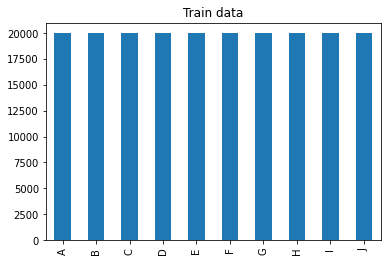

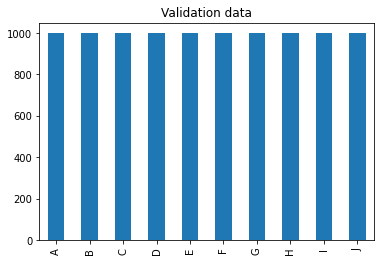

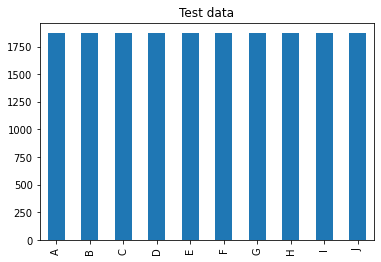

In [98]:
data_train['label'].value_counts().sort_index().plot.bar()
plt.title("Train data")
plt.show()

data_valid['label'].value_counts().sort_index().plot.bar()
plt.title("Validation data")
plt.show()

data_test['label'].value_counts().sort_index().plot.bar()
plt.title("Test data")
plt.show()

In [102]:
train_generator = keras.preprocessing.image.ImageDataGenerator()\
    .flow_from_dataframe(data_train, x_col="file", y_col="label", color_mode="grayscale", target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

validate_generator = keras.preprocessing.image.ImageDataGenerator()\
    .flow_from_dataframe(data_valid, x_col="file", y_col="label", color_mode="grayscale", target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

test_generator = keras.preprocessing.image.ImageDataGenerator()\
    .flow_from_dataframe(data_test, x_col="file", y_col="label", color_mode="grayscale", target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE, shuffle=False)

Found 200000 validated image filenames belonging to 10 classes.
Found 10000 validated image filenames belonging to 10 classes.
Found 18724 validated image filenames belonging to 10 classes.


In [106]:
def get_model() -> keras.models.Sequential:
    model = keras.models.Sequential()

    model.add(InputLayer((IMAGE_SIZE, IMAGE_SIZE, 1)))

    model.add(Conv2D(48, 5, activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, 5, activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, 5, activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(160, 5, activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))

    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation="softmax"))

    model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
    model.summary()

    return model

callbacks = [EarlyStopping(patience=10)]
model = get_model()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 48)        1248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        76864     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 128)         204928    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 160)        

In [107]:
model.fit(train_generator, epochs=EPOCHS, validation_data=validate_generator, callbacks=callbacks)
print("Loss, Accuracy:", model.evaluate(test_generator))

Epoch 1/50
1613/1613 [==============================] - 35s 22ms/step - loss: 0.4857 - accuracy: 0.8646 - val_loss: 0.3624 - val_accuracy: 0.8955

In [ ]:
del data_train, data_valid, data_test

In [2]:
# 2. После уточнения модели на синтетических данных попробуйте обучить ее на реальных данных (набор Google Street View). Что изменилось в модели?

def get_data_structure(filepath):
    try:
        if pathlib.Path(filepath).is_file():
            with open(filepath) as file:
                data = json.load(file)
            return data
    except:
        pass
    f = h5py.File(filepath, 'r')

    data = {
        'label': [],
        'height': [],
        'width': [],
        'left': [],
        'top': [],
    }

    def add_attrs(name, obj):
        vals = []
        if obj.shape[0] == 1:
            vals.append(obj[0][0])
        else:
            for k in range(obj.shape[0]):
                vals.append(f[obj[k][0]][0][0])
        data[name].append(vals)

    for item in f['/digitStruct/bbox']:
        f[item[0]].visititems(add_attrs)

    with open(filepath, 'w') as file:
        json.dump(data, file)

    return data

def crop_image(filepath, struct):
    img = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_height, img_width, *_ = img.shape
    filename = filepath.split('\\')[-1].split('.')[0]
    img_index = int(filename) - 1
    left = np.min(struct['left'][img_index])
    top = np.min(struct['top'][img_index])
    bottom = (np.max(struct['top'][img_index]) + np.max(struct['height'][img_index]))
    right = (np.max(struct['left'][img_index]) + np.max(struct['width'][img_index]))

    box_width = right - left
    box_height = bottom - top

    left = np.max((0, int(left - box_width * 0.1))).astype(np.uint)
    right = np.min((img_width, int(right + box_width * 0.1))).astype(np.uint)
    bottom = np.min((img_height, int(bottom + box_height * 0.1))).astype(np.uint)
    top = np.max((0, int(top - box_height * 0.1))).astype(np.uint)

    cropped = img[top:bottom, left:right, :].copy()
    rescaled = cv2.resize(cropped, (NEW_IMAGE_SIZE, NEW_IMAGE_SIZE))
    return rescaled

def load_dataset(folder, data_struct, max_numbers_size=5):
    data_dir = pathlib.Path(f'./{folder}/')

    X, Y = [], []
    for fn in list(data_dir.glob('*.png')):
        image_ind = int(fn.name.split('.')[0])
        try:
            labels = data_struct['label'][image_ind - 1]
            labels_len = len(labels)
        except Exception:
            continue

        if labels_len > max_numbers_size:
            continue

        labels = [int(l) for l in labels]
        labels = [l if l != 10 else 0 for l in labels]
        labels.extend([10] * (max_numbers_size - labels_len))
        labels.insert(0, labels_len)

        image = crop_image(str(fn), data_struct)
        array = image / 255

        X.append(array)
        Y.append(labels)

    return np.array(X), np.array(Y)

In [3]:
print("Load data")
train_struct = get_data_structure('./train/digitStruct.mat')

Load data


In [4]:
X_train, Y_train = load_dataset('train', train_struct)

In [5]:
Y_train = [np.array(i) for i in sequence.pad_sequences(Y_train, maxlen=6).T]

In [109]:
print("Build model")

def get_model() -> keras.models.Sequential:

    input = Input(shape=(NEW_IMAGE_SIZE, NEW_IMAGE_SIZE, 3))

    model = Conv2D(8, 5, activation="relu", padding="same")(input)
    model = MaxPool2D(pool_size=(2, 2))(model)
    model = Dropout(0.5)(model)

    model = Conv2D(16, 5, activation="relu", padding="same")(model)
    model = MaxPool2D(pool_size=(2, 2))(model)
    model = Dropout(0.5)(model)

    model = Conv2D(32, 5, activation="relu", padding="same")(model)
    model = MaxPool2D(pool_size=(2, 2))(model)
    model = Dropout(0.5)(model)


    model = Flatten()(model)

    model = Dense(32, activation="relu")(model)
    model = Dropout(0.2)(model)

    model = Dense(64, activation="relu")(model)
    model = Dropout(0.2)(model)

    o1 = Dense(6, activation='softmax')(model)
    o2 = Dense(11, activation='softmax')(model)
    o3 = Dense(11, activation='softmax')(model)
    o4 = Dense(11, activation='softmax')(model)
    o5 = Dense(11, activation='softmax')(model)
    o6 = Dense(11, activation='softmax')(model)

    model = keras.Model(inputs=input, outputs=[o1, o2, o3, o4, o5, o6])

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
    model.summary()
    return model

callbacks = [EarlyStopping(patience=10)]
model = get_model()

Build model
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 50, 50, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 50, 50, 8)    608         input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_12 (MaxPooling2D) (None, 25, 25, 8)    0           conv2d_12[0][0]                  
__________________________________________________________________________________________________
dropout_6 (Dropout)             (None, 25, 25, 8)    0           max_pooling2d_12[0][0]           
__________________________________________________________________________________

In [111]:
keras.backend.clear_session()
model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/50
216/216 [==============================] - 3s 12ms/step - loss: 6.0906 - dense_11_loss: 0.6519 - dense_12_loss: 2.0127 - dense_13_loss: 2.1378 - dense_14_loss: 1.0503 - dense_15_loss: 0.2312 - dense_16_loss: 0.0065 - dense_11_accuracy: 0.7335 - dense_12_accuracy: 0.2690 - dense_13_accuracy: 0.2422 - dense_14_accuracy: 0.7030 - dense_15_accuracy: 0.9574 - dense_16_accuracy: 0.9997 - val_loss: 5.9122 - val_dense_11_loss: 0.5759 - val_dense_12_loss: 1.9650 - val_dense_13_loss: 2.1317 - val_dense_14_loss: 0.9900 - val_dense_15_loss: 0.2440 - val_dense_16_loss: 0.0056 - val_dense_11_accuracy: 0.7855 - val_dense_12_accuracy: 0.2830 - val_dense_13_accuracy: 0.2694 - val_dense_14_accuracy: 0.7180 - val_dense_15_accuracy: 0.9545 - val_dense_16_accuracy: 0.9997

In [59]:
test_struct = get_data_structure('./test/digitStruct.mat')
X_test, Y_test = load_dataset('test', test_struct)
Y_test = [np.array(i) for i in sequence.pad_sequences(Y_test, maxlen=6).T]

In [92]:
prediction = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE)

print("Total Loss", prediction[0])
print("Loss", prediction[1:7])
print("Accuracy:", prediction[7:])

106/106 [==============================] - 1s 7ms/step - loss: 3.0943 - dense_2_loss: 0.2584 - dense_3_loss: 1.0715 - dense_4_loss: 1.2907 - dense_5_loss: 0.4268 - dense_6_loss: 0.0447 - dense_7_loss: 0.0022 - dense_2_accuracy: 0.9012 - dense_3_accuracy: 0.6582 - dense_4_accuracy: 0.5907 - dense_5_accuracy: 0.8696 - dense_6_accuracy: 0.9888 - dense_7_accuracy: 0.9998

In [93]:
model.save('D:\\nn_models.h5')

In [95]:
import tensorflow as tf

loaded_model = tf.keras.models.load_model('D:\\nn_models.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

with open("D:\\LabWork4Model.tflite", 'wb') as f:
  f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp4o45ce3t\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp4o45ce3t\assets
